In [1]:
data <- read.csv("new_chr2_static_classified.csv")
head(data,10)
# tail(data,10)
# head(read.csv("new_chr19_static_classified.csv"))

X,binID,start,cata,aRead,bRead,aNorm,bNorm
194230,chr2_3052400,3052300,3,36,84,52.941176,59.154930
88154,chr2_3052400,3052300,2,29,49,42.647059,34.507042
1,chr2_3052400,3052300,1,3,9,4.411765,6.338028
194231,chr2_3052500,3052400,3,39,67,50.000000,52.755905
88155,chr2_3052500,3052400,2,32,51,41.025641,40.157480
2,chr2_3052500,3052400,1,7,9,8.974359,7.086614
194232,chr2_3052800,3052700,3,140,199,90.322581,87.665198
88156,chr2_3052800,3052700,2,15,28,9.677419,12.334802
194233,chr2_3053500,3053400,3,289,430,95.695364,89.958159
88157,chr2_3053500,3053400,2,8,28,2.649007,5.857741


In [2]:
high_sub <- data[data$cata == 3, c("binID", "start", "bRead")]
names(high_sub) <- c("binID", "start", "high")
# head(high_sub)
medium_sub <- data[data$cata == 2, c("binID", "start", "bRead")]
names(medium_sub) <- c("binID", "start", "medium")
# head(medium_sub)
low_sub <- data[data$cata == 1, c("binID", "start", "bRead")]
names(low_sub) <- c("binID", "start", "low")
# head(low_sub)

# merge
clusterdf <- merge(high_sub, medium_sub, all = TRUE)
clusterdf <- merge(clusterdf, low_sub, all = TRUE)
clusterdf <- clusterdf[order(as.numeric(clusterdf$start)),]
clusterdf[is.na(clusterdf)] <- 0
head(clusterdf,10)

,binID,start,high,medium,low
67425,chr2_3052400,3052300,84,49,9
67426,chr2_3052500,3052400,67,51,9
67428,chr2_3052800,3052700,199,28,0
67438,chr2_3053500,3053400,430,28,20
67441,chr2_3053600,3053500,156,53,7
67452,chr2_3054600,3054500,227,27,0
67458,chr2_3055200,3055100,14,0,0
67482,chr2_3056800,3056700,27,13,3
67513,chr2_3061100,3061000,99,93,50
67519,chr2_3061300,3061200,118,77,19


In [3]:
paste("Total number of Bins:", nrow(clusterdf))

[1] "Total number of Bins: 113413"

In [4]:
# write.csv(clusterdf, "A_clusterdf_count.csv")

In [5]:
dist_tolerance <- 100
# meth_tolerance <- 40 
# cor_2_cutoff <- 0.9
alpha <- 0.05

In [6]:
pre.row <- clusterdf[1,]

dist.fun <- function(row) {
    dist <- as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"]))
    pre.row <<- row
    return(c(row["binID"], row["start"], row["high"], row["medium"], row["low"], dist = dist)) 
}

dist.result <- t(apply(clusterdf, 1, dist.fun))
dist.result <- as.data.frame(dist.result)
head(dist.result, 30)

,binID,start,high,medium,low,dist
67425,chr2_3052400,3052300,84,49,9,0
67426,chr2_3052500,3052400,67,51,9,100
67428,chr2_3052800,3052700,199,28,0,300
67438,chr2_3053500,3053400,430,28,20,700
67441,chr2_3053600,3053500,156,53,7,100
67452,chr2_3054600,3054500,227,27,0,1000
67458,chr2_3055200,3055100,14,0,0,600
67482,chr2_3056800,3056700,27,13,3,1600
67513,chr2_3061100,3061000,99,93,50,4300
67519,chr2_3061300,3061200,118,77,19,200


In [7]:
dist.result <- dist.result[as.numeric(as.character(dist.result$dist)) <= dist_tolerance, ]
head(dist.result)

dist.result <- dist.result[-1,]
head(dist.result)
nrow(dist.result)

,binID,start,high,medium,low,dist
67425,chr2_3052400,3052300,84,49,9,0
67426,chr2_3052500,3052400,67,51,9,100
67441,chr2_3053600,3053500,156,53,7,100
67688,chr2_3081200,3081100,18,44,2,100
67792,chr2_3090000,3089900,100,23,10,100
68286,chr2_3137700,3137600,166,14,0,100


,binID,start,high,medium,low,dist
67426,chr2_3052500,3052400,67,51,9,100
67441,chr2_3053600,3053500,156,53,7,100
67688,chr2_3081200,3081100,18,44,2,100
67792,chr2_3090000,3089900,100,23,10,100
68286,chr2_3137700,3137600,166,14,0,100
68315,chr2_3140600,3140500,107,60,83,100


[1] 15177

In [8]:
start.pos <- dist.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3052300   3052400   3053400   3053500   3081000   3081100   3089800
    [8]   3089900   3137500   3137600   3140400   3140500   3143300   3143400
   [15]   3148700   3148800   3149400   3149500   3154800   3154900   3186300
   [22]   3186400   3187500   3187600   3200100   3200200   3226600   3226700
   [29]   3227300   3227400   3281100   3281200   3288600   3288700   3316900
   [36]   3317000   3324100   3324200   3329100   3329200   3333100   3333200
   [43]   3340300   3340400   3375500   3375600   3375700   3379200   3379300
   [50]   3424500   3424600   3426100   3426200   3437900   3438000   3474000
   [57]   3474100   3477800   3477900   3487300   3487400   3496200   3496300
   [64]   3522800   3522900   3525800   3525900   3526400   3526500   3550900
   [71]   3551000   3569000   3569100   3597000   3597100   3611100   3611200
   [78]   3630900   3631000   3640200   3640300   3648200   3648300   3663100
   [85]   3663200   3730900   3731000   3736800   3736900   3742900   3743000
   [92]   3743200   3743300   3745600   3745700   3767000   3767100   3785700
   [99]   3785800   3785900   3793000   3793100   3798900   3799000   3834900
  [106]   3835000   3835900   3836000   3842500   3842600   3866200   3866300
  [113]   3895100   3895200   3911400   3911500   3918300   3918400   3923500
  [120]   3923600   3932800   3932900   3970600   3970700   3977500   3977600
  [127]   3979100   3979200   3979500   3979600   3984500   3984600   4025000
  [134]   4025100   4025200   4046900   4047000   4079200   4079300   4081900
  [141]   4082000   4082100   4082700   4082800   4102400   4102500   4137100
  [148]   4137200   4144000   4144100   4144300   4144400   4168000   4168100
  [155]   4168200   4200600   4200700   4200800   4206000   4206100   4206200
  [162]   4206300   4223500   4223600   4234400   4234500   4234700   4234800
  [169]   4259200   4259300   4268400   4268500   4270100   4270200   4297100
  [176]   4297200   4299700   4299800   4301000   4301100   4307900   4308000
  [183]   4311100   4311200   4324400   4324500   4338600   4338700   4338800
  [190]   4338900   4341600   4341700   4348200   4348300   4391900   4392000
  [197]   4404400   4404500   4411200   4411300   4414300   4414400   4421300
  [204]   4421400   4466100   4466200   4477500   4477600   4478400   4478500
  [211]   4489900   4490000   4507900   4508000   4508300   4508400   4522300
  [218]   4522400   4527400   4527500   4529700   4529800   4540900   4541000
  [225]   4546300   4546400   4549400   4549500   4549600   4551000   4551100
  [232]   4551200   4553400   4553500   4582100   4582200   4603400   4603500
  [239]   4604100   4604200   4613300   4613400   4629400   4629500   4629600
  [246]   4629700   4651700   4651800   4651900   4671800   4671900   4684400
  [253]   4684500   4700400   4700500   4701100   4701200   4701300   4707100
  [260]   4707200   4723100   4723200   4723300   4739500   4739600   4741500
  [267]   4741600   4743300   4743400   4744400   4744500   4745800   4745900
  [274]   4750000   4750100   4750200   4750300   4754900   4755000   4758900
  [281]   4759000   4773600   4773700   4801100   4801200   4807300   4807400
  [288]   4817600   4817700   4821000   4821100   4824000   4824100   4825800
  [295]   4825900   4837500   4837600   4859300   4859400   4862000   4862100
  [302]   4864900   4865000   4873500   4873600   4883000   4883100   4885400
  [309]   4885500   4893900   4894000   4897500   4897600   4909300   4909400
  [316]   4936000   4936100   4945300   4945400   4945500   4946400   4946500
  [323]   4946600   4953700   4953800   4955200   4955300   4956500   4956600
  [330]   4968600   4968700   4968800   4973300   4973400   4981600   4981700
  [337]   4986400   4986500   4986600   5004100   5004200   5008700   5008800
  [344]   5021300   5021400   5026900   5027000   5031700   5031800   5037800
  [351]   5037900   5044900   5045000   5061800   5061900   5084300   5084400
  [358]   5084500   511090

In [9]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
dist.result <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
67425,chr2_3052400,3052300,84,49,9
67426,chr2_3052500,3052400,67,51,9
67438,chr2_3053500,3053400,430,28,20
67441,chr2_3053600,3053500,156,53,7
67686,chr2_3081100,3081000,167,33,3
67688,chr2_3081200,3081100,18,44,2
67791,chr2_3089900,3089800,281,77,18
67792,chr2_3090000,3089900,100,23,10
68285,chr2_3137600,3137500,293,72,11
68286,chr2_3137700,3137600,166,14,0


In [10]:
pre.row <- dist.result[1,]

test.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = "0"))
    } else {
        test.matrix <- cbind(c(as.numeric(as.character(pre.row["high"])),
                               as.numeric(as.character(pre.row["medium"])),
                               as.numeric(as.character(pre.row["low"]))),
                             c(as.numeric(as.character(row["high"])), 
                               as.numeric(as.character(row["medium"])),
                               as.numeric(as.character(row["low"]))))
        test.matrix <- test.matrix[rowSums(test.matrix) > 0, ]
        value <- suppressWarnings(chisq.test(test.matrix)$p.value)
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = as.character(value)))
    }
}

test.result <- apply(dist.result[-1,], MARGIN = 1, FUN = test.fun)
test.result <- t(test.result)
test.result <- as.data.frame(test.result)
head(test.result)

,binID,start,p.value
67426,chr2_3052500,3052400,0.570934496280813
67438,chr2_3053500,3053400,0
67441,chr2_3053600,3053500,1.16128867118706e-11
67686,chr2_3081100,3081000,0
67688,chr2_3081200,3081100,1.90858962168719e-15
67791,chr2_3089900,3089800,0


In [11]:
good.result <- test.result[as.numeric(as.character(test.result$p.value)) > alpha,]
head(good.result)

,binID,start,p.value
67426,chr2_3052500,3052400,0.570934496280813
67792,chr2_3090000,3089900,0.397968348562097
68315,chr2_3140600,3140500,0.219622645122052
68488,chr2_3155000,3154900,0.692965567693168
68804,chr2_3187700,3187600,0.338176890512986
70219,chr2_3317100,3317000,0.502218227153176


In [12]:
start.pos <- good.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3052300   3052400   3089800   3089900   3140400   3140500   3154800
   [8]   3154900   3187500   3187600   3316900   3317000   3375500   3375600
  [15]   3375700   3477800   3477900   3526400   3526500   3550900   3551000
  [22]   3611100   3611200   3648200   3648300   3736800   3736900   3742900
  [29]   3743000   3793000   3793100   3834900   3835000   3923500   3923600
  [36]   3932800   3932900   3979100   3979200   3979500   3979600   3984500
  [43]   3984600   4025000   4025100   4046900   4047000   4082700   4082800
  [50]   4102400   4102500   4200600   4200700   4206100   4206200   4223500
  [57]   4223600   4270100   4270200   4299700   4299800   4301000   4301100
  [64]   4324400   4324500   4466100   4466200   4477500   4477600   4478400
  [71]   4478500   4507900   4508000   4522300   4522400   4540900   4541000
  [78]   4546300   4546400   4549400   4549500   4582100   4582200   4613300
  [85]   4613400   4700400   4700500   4701100   4701200   4723100   4723200
  [92]   4723300   4741500   4741600   4745800   4745900   4750000   4750100
  [99]   4754900   4755000   4758900   4759000   4807300   4807400   4883000
 [106]   4883100   4885400   4885500   4897500   4897600   4946500   4946600
 [113]   4953700   4953800   4973300   4973400   4986400   4986500   5004100
 [120]   5004200   5008700   5008800   5021300   5021400   5031700   5031800
 [127]   5061800   5061900   5188700   5188800   5188900   5202000   5202100
 [134]   5226300   5226400   5226500   5229100   5229200   5281200   5281300
 [141]   5348300   5348400   5352300   5352400   5412700   5412800   5482300
 [148]   5482400   5568000   5568100   5582600   5582700   5655200   5655300
 [155]   5674200   5674300   5676900   5677000   5677100   5682100   5682200
 [162]   5741500   5741600   5765900   5766000   5777600   5777700   5841200
 [169]   5841300   5841400   5841500   5844600   5844700   5853900   5854000
 [176]   5876900   5877000   5923100   5923200   5934000   5934100   5934200
 [183]   5934300   5951900   5952000   6010700   6010800   6015200   6015300
 [190]   6101900   6102000   6133500   6133600   6171100   6171200   6198700
 [197]   6198800   6198900   6199000   6211100   6211200   6279800   6279900
 [204]   6306400   6306500   6344800   6344900   6345200   6345300   6345400
 [211]   6345500   6351300   6351400   6365500   6365600   6376800   6376900
 [218]   6381500   6381600   6389800   6389900   6394400   6394500   6401400
 [225]   6401500   6423900   6424000   6447000   6447100   6495400   6495500
 [232]   6500200   6500300   6500400   6706000   6706100   6706700   6706800
 [239]   6706900   6738700   6738800   6788600   6788700   6795200   6795300
 [246]   6830100   6830200   6933300   6933400   6978700   6978800   6990700
 [253]   6990800   7100700   7100800   7105700   7105800   7149500   7149600
 [260]   7393400   7393500   7415100   7415200   7428700   7428800   7563500
 [267]   7563600   7563700   7586200   7586300   7586800   7586900   7587000
 [274]   7594000   7594100   7595300   7595400   7620000   7620100   7645600
 [281]   7645700   7823400   7823500   7922100   7922200   8047300   8047400
 [288]   8197100   8197200   8198800   8198900   8215900   8216000   8216700
 [295]   8216800   8217500   8217600   8373200   8373300   8404800   8404900
 [302]   8439600   8439700   8528500   8528600   8529700   8529800   8556500
 [309]   8556600   8698100   8698200   8814700   8814800   8825000   8825100
 [316]   8959100   8959200   8993700   8993800   9014900   9015000   9025500
 [323]   9025600   9093100   9093200   9157900   9158000   9212700   9212800
 [330]   9235500   9235600   9235900   9236000   9237000   9237100   9334900
 [337]   9335000   9409200   9409300   9422200   9422300   9428900   9429000
 [344]   9463900   9464000   9518400   9518500   9528800   9528900   9616400
 [351]   9616500   9695000   9695100   9708400   9708500   9741700   9741800
 [358]   9761500   9761600   9855100   9855200   9865400   9865500   9875800

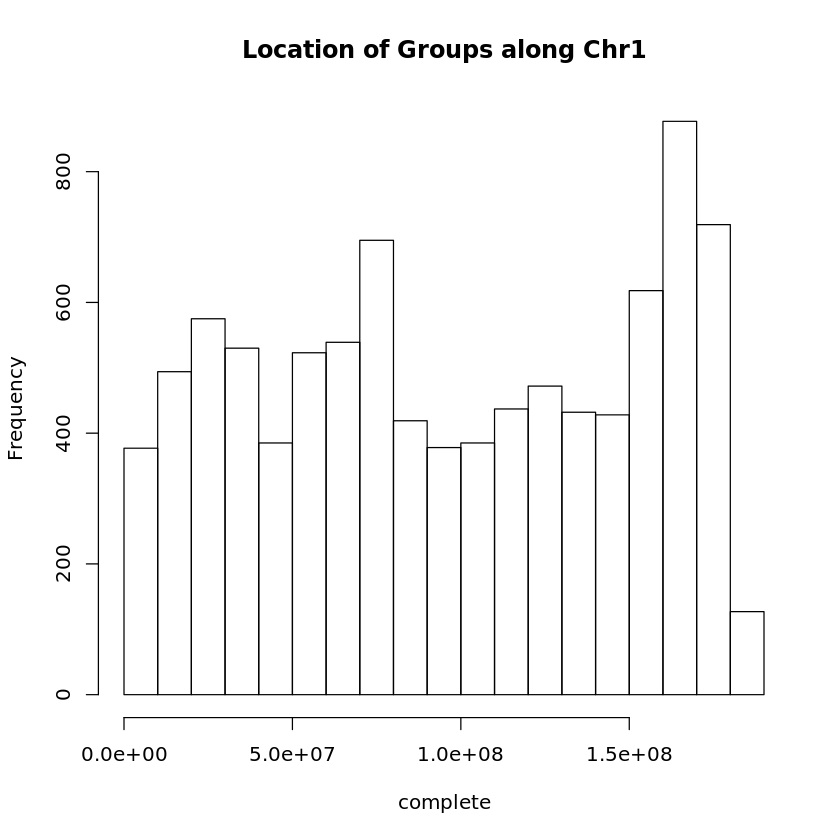

In [13]:
hist(complete, main = "Location of Groups along Chr1")

In [14]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
grouping <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
67425,chr2_3052400,3052300,84,49,9
67426,chr2_3052500,3052400,67,51,9
67791,chr2_3089900,3089800,281,77,18
67792,chr2_3090000,3089900,100,23,10
68312,chr2_3140500,3140400,78,51,45
68315,chr2_3140600,3140500,107,60,83
68487,chr2_3154900,3154800,173,74,26
68488,chr2_3155000,3154900,135,49,17
68803,chr2_3187600,3187500,347,42,0
68804,chr2_3187700,3187600,327,42,2


In [15]:
paste("Total number of bins grouped:", nrow(grouping))

[1] "Total number of bins grouped: 9410"

In [16]:
library(ggplot2)

In [17]:
pre.row <- grouping[1,]

part <- data.frame()
part <- rbind(part, pre.row)

counter = 1
sep.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        part <<- rbind(part, data.frame(binID = c(paste("gap", counter)), 
                                        start = c(0), high = c(100), medium = c(100), low = c(100)))
        counter <<- counter + 1
    }
    part <<- rbind(part, row)
    pre.row <<- row
}

invisible(apply(grouping[-1,], 1, sep.fun))

In [18]:
part[20:60,]

,binID,start,high,medium,low
20,chr2_3375700,3375600,130,12,0
21,chr2_3375800,3375700,273,24,0
110,gap 7,0,100,100,100
23,chr2_3477900,3477800,266,32,0
24,chr2_3478000,3477900,235,35,0
112,gap 8,0,100,100,100
26,chr2_3526500,3526400,179,60,18
27,chr2_3526600,3526500,302,70,22
113,gap 9,0,100,100,100
29,chr2_3551000,3550900,59,0,0


In [19]:
head(part)
tail(part)

,binID,start,high,medium,low
67425,chr2_3052400,3052300,84,49,9
2,chr2_3052500,3052400,67,51,9
1,gap 1,0,100,100,100
4,chr2_3089900,3089800,281,77,18
5,chr2_3090000,3089900,100,23,10
11,gap 2,0,100,100,100


,binID,start,high,medium,low
15107,gap 4476,0,100,100,100
138831,chr2_181961000,181960900,96,12,4
138841,chr2_181961100,181961000,132,19,0
15108,gap 4477,0,100,100,100
138861,chr2_181964700,181964600,100,31,6
138871,chr2_181964800,181964700,85,26,0


In [20]:
write.csv(part, "chr2_B_group.csv")

[1] "Total Number of groups: 4478"

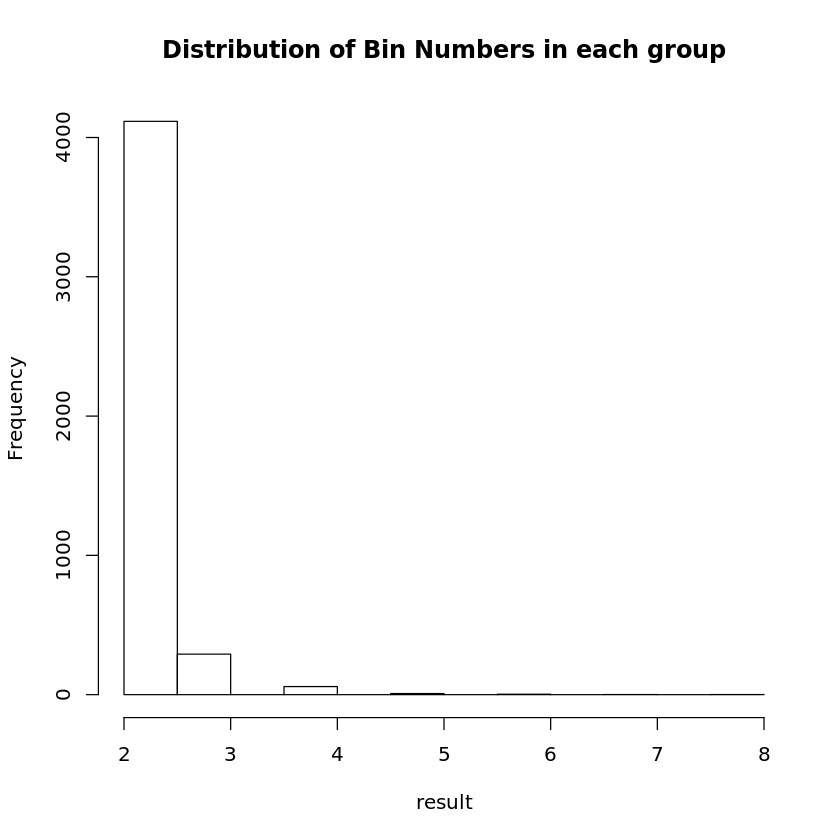

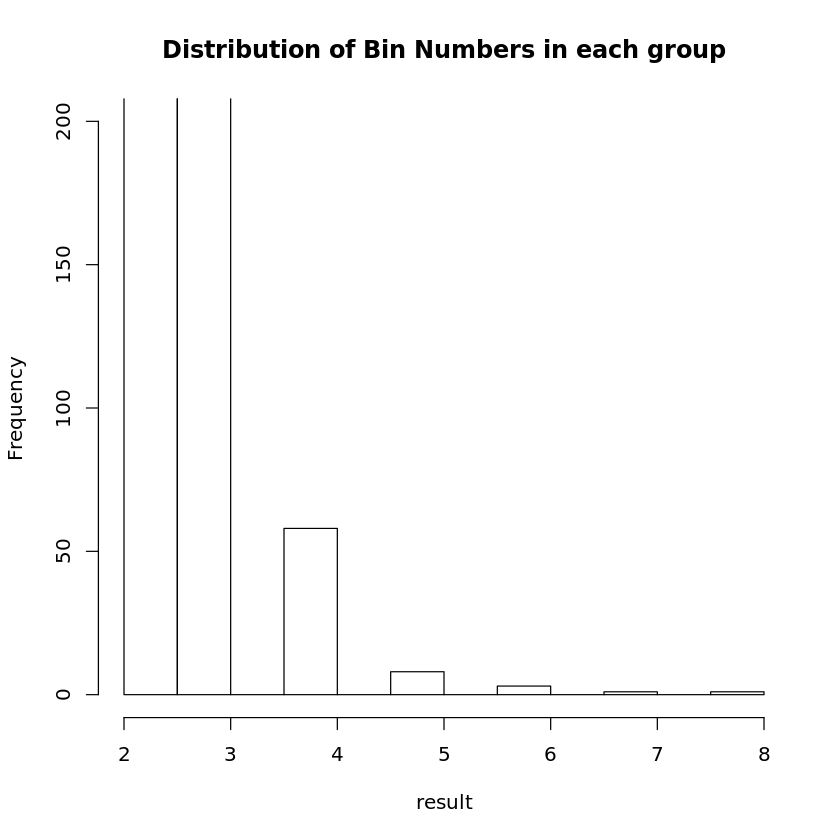

In [21]:
count = 0
result = c()
for (row in 1:nrow(part)) {
    if (substr(as.character(part[row, "binID"]), 1, 3) != "gap") {
        count = count + 1
    } else {
        result = c(result, count)
        count = 0
    }
}

result = c(result, count)

paste("Total Number of groups:", length(result))
hist(result, main = "Distribution of Bin Numbers in each group")
hist(result, ylim = c(0, 200), main = "Distribution of Bin Numbers in each group")

In [22]:
# plotdf <- data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,3])), cata = c(3))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,4])), cata = c(4)))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,5])), cata = c(5)))


# plotdf

In [23]:
# for (i in 2:nrow(part)){
#     if (substr(as.character(part[i,1]),1,3) == "gap"){
#         plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
#     } else {
#         for (j in 3:5){
#             plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(as.character(part[i,j]))), cata = c(j)))
#         }
#     }
    
# }

# head(plotdf, 10)

In [24]:
# plotdf$cata <- factor(plotdf$cata, levels = c(3,4,5,1), labels = c("high", "medium", "low", "gap"))

# head(plotdf,100)

In [25]:
# plotdf$bin_ID <- factor(plotdf$bin_ID, levels = unique(plotdf$bin_ID))

In [26]:
# plotdf$per <- as.numeric(as.character(plotdf$per))

In [27]:
# names(plotdf) <- c("bin_ID", "count", "cata")

In [28]:
# ggplot(data = plotdf, aes(x = bin_ID, y = count, fill = factor(cata))) + coord_flip() + 
#   geom_bar(stat = "identity", width = 2) + ylim(0, 300) + scale_fill_brewer(palette="Spectral")

In [29]:
# zoomindf <- head(plotdf, 200)
# ggplot(data = zoomindf, aes(x = bin_ID, y = count, fill = factor(cata))) + 
#   geom_bar(stat = "identity") + ylim(0, 500) + scale_fill_brewer(palette="Spectral")